In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
def strip_shorten(text):
    try:
        return text.strip()[:3]
    except AttributeError:
        return text
def strip_entry(text):
    try:
        return text.strip()
    except AttributeError:
        return text
    
def datify(year,month):
    return pd.to_datetime(str(year)+'-'+month,format='%Y-%b')

def datify_2020(month):
    return pd.to_datetime('2020-'+month,format='%Y-%b')
    



In [62]:
df_temp=pd.read_csv('data/tas_1991_2016.csv',sep=',',usecols=[0,1,2,3],names=['TemperatureC','Year','Month','Country'],header=0,
                   converters={'Month':strip_shorten,'Country':strip_entry})

In [63]:
#df_temp['Date']=df_temp.apply(lambda row: datify(row['Year'], row['Month']), axis=1)

In [64]:
df_temp

,TemperatureC,Year,Month,Country
0,-0.03110,1991,Jan,Afghanistan
1,1.43654,1991,Feb,Afghanistan
2,6.88685,1991,Mar,Afghanistan
3,12.93970,1991,Apr,Afghanistan
4,17.07550,1991,May,Afghanistan
...,...,...,...,...
61147,18.75550,2016,Aug,Zimbabwe
61148,22.99190,2016,Sep,Zimbabwe
61149,25.86640,2016,Oct,Zimbabwe
61150,25.85150,2016,Nov,Zimbabwe


In [46]:
pd.MultiIndex.from_product([['Italy'], list(set(df_temp.Month))])

MultiIndex([('Italy', 'Oct'),
            ('Italy', 'Aug'),
            ('Italy', 'Jun'),
            ('Italy', 'Feb'),
            ('Italy', 'Dec'),
            ('Italy', 'Nov'),
            ('Italy', 'Sep'),
            ('Italy', 'Apr'),
            ('Italy', 'Jan'),
            ('Italy', 'Mar'),
            ('Italy', 'Jul'),
            ('Italy', 'May')],
           )

In [80]:
df_avg=df_temp.groupby(['Country','Month']).aggregate({'TemperatureC': np.mean}).reset_index()
df_avg[df_avg['Country']=='Italy']

,Country,Month,TemperatureC
1008,Italy,Apr,10.799226
1009,Italy,Aug,21.818735
1010,Italy,Dec,5.270245
1011,Italy,Feb,4.799260
1012,Italy,Jan,4.399704
1013,Italy,Jul,21.734204
1014,Italy,Jun,19.121765
1015,Italy,Mar,7.650782
1016,Italy,May,15.175188
1017,Italy,Nov,9.189272


In [81]:
df_avg['MonthlyDate']=df_avg.apply(lambda row: datify_2020(row['Month']), axis=1)

<AxesSubplot:xlabel='MonthlyDate', ylabel='TemperatureC'>

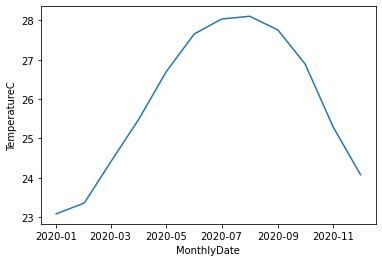

In [82]:
sns.lineplot(data=df_avg[df_avg.Country=='Cuba'].sort_values('MonthlyDate'),x='MonthlyDate',y='TemperatureC')

In [113]:
df_avg.sort_values(['Country','MonthlyDate'],inplace=True)
df_piv = df_avg[['Country','MonthlyDate','TemperatureC']].pivot(index='MonthlyDate', columns='Country')
start_date = df_piv.index.min() - pd.DateOffset(day=1)
end_date = df_piv.index.max() + pd.DateOffset(day=31)
print(start_date)
print(end_date)
dates = pd.date_range(start_date, end_date, freq='D')
dates.name = 'Date'
df_piv = df_piv.reindex(dates,fill_value=np.nan)
df_piv.loc['2021-01-01',:]=df_piv.loc['2020-01-01',:]
df_piv.set_index(pd.to_datetime(df_piv.index),inplace=True)
df_piv=df_piv.interpolate(method='quadratic')
df_piv.drop(pd.to_datetime('2021-01-01'),inplace=True)
df_piv = df_piv.stack('Country')
df_piv = df_piv.sort_index(level=1)
df_piv = df_piv.reset_index()

2020-01-01 00:00:00
2020-12-31 00:00:00


<AxesSubplot:>

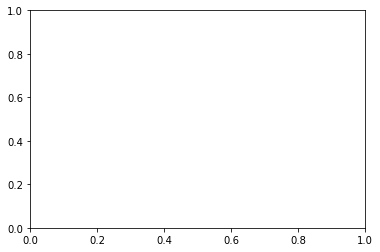

In [123]:
sns.lineplot(data=df_piv[df_piv.Country=='HongKong'].sort_values('Date'),x='Date',y='TemperatureC')

In [127]:
[co for co in list(set(df_piv.Country)) if 'Berm' in co]


[]

In [124]:
set(df_piv.Country)

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Democratic Republic of the)',
 'Congo (Republic of the)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Federated States of Micronesia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Grenada',
 

In [115]:
df_piv.shape

(71370, 3)

In [121]:
len(set(df_avg.Country))

195

In [119]:
df_piv

,Date,Country,TemperatureC
0,2020-01-01,Afghanistan,0.818403
1,2020-01-02,Afghanistan,0.813458
2,2020-01-03,Afghanistan,0.813106
3,2020-01-04,Afghanistan,0.817348
4,2020-01-05,Afghanistan,0.826183
...,...,...,...
71365,2020-12-27,Zimbabwe,24.671409
71366,2020-12-28,Zimbabwe,24.673880
71367,2020-12-29,Zimbabwe,24.677100
71368,2020-12-30,Zimbabwe,24.681069
